In [5]:
import numpy as np
import scipy.special
import pandas as pd
import itertools

In [6]:
import matplotlib.pyplot as plt

## Analysis of the buff and how fast you can get it up

In [7]:
# Proc chance of Rivenspike is 4.93% ±0.66% according to Fight Club Discord
proc_chance = 0.05

In [8]:
def probability_three_stacks_not_up(num_hits):
    num_procs = [0, 1, 2]
    probabilities = [scipy.special.binom(num_hits, num_proc)*(proc_chance**num_proc) * (1-proc_chance)**(num_hits-num_proc) for num_proc in num_procs]
    return sum(probabilities)

In [9]:
total_hits = [i for i in range(3, 500)]

In [34]:
probabilies_three_stacks = [1 - probability_three_stacks_not_up(hits) for hits in total_hits]

In [35]:
# create a pandas dataframe for further analysis
df = pd.DataFrame({'hits': total_hits, 'probability': probabilies_three_stacks})

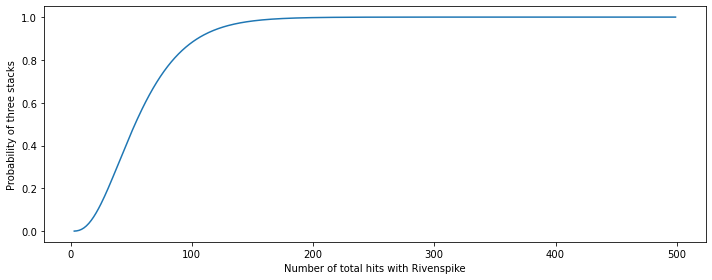

In [36]:
# plot the graph
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['hits'], df['probability'])
ax.set_ylabel('Probability of three stacks')
ax.set_xlabel('Number of total hits with Rivenspike')
fig.tight_layout()

Lets calculate the minimum number of Rivenspike hits (assuming previous proc doesn't fall off) to get 3 stacks on boss with a probability of at least 95%

In [37]:
num_hits_required_95_percent = df.loc[df['probability'] >= 0.95, 'hits'].iloc[0]

In [38]:
num_hits_required_95_percent

124

The average number of hits required for three stacks is, however, much lower and can also easily be calculated.
For that, we are first interested in the probabilty to get the third stack up on the n-th hit: <br /> <br />
$ P = {n-1 \choose 2}p^2(1-p)^{n-1-2}p$ <br /> <br />
where p is the proc chance and  n is the number of hits.

In [39]:
def probability_third_stack_on_nth_hit(n):
    return scipy.special.binom(n-1, 2)*(proc_chance**2) * (1-proc_chance)**(n-3)*proc_chance

Taking the expected value yields

In [42]:
avg_num_hits_for_three_stacks = sum([n*probability_third_stack_on_nth_hit(n) for n in range(3, 10000)])
avg_num_hits_for_three_stacks

59.999999999999815

Intuitevly 60 hits makes sense since you also you would also need to roll a dice on average 6 times to get a six.

### How long does it take to apply 60 Rivenspike hits on the boss?
### Assumptions:
- Each Warrior has Windfury
- Full worldbuffs
- Conservative assumptions on gear (default gear on Steppenwolf spreadsheet)

<img src="hits_per_second.png">

In [43]:
hits_per_sec_dual_wield = 1.70037
hits_per_sec_offhand = 0.4689

In [44]:
num_warriors_with_rivenspike = range(1, 25)

In [45]:
time_for_3_stacks_dw = [avg_num_hits_for_three_stacks/(num_warrior * hits_per_sec_dual_wield) for num_warrior in num_warriors_with_rivenspike]
time_for_3_stacks_dw

[35.286437657686164,
 17.643218828843082,
 11.762145885895386,
 8.821609414421541,
 7.0572875315372325,
 5.881072942947693,
 5.040919665383737,
 4.410804707210771,
 3.9207152952984625,
 3.5286437657686163,
 3.2078579688805604,
 2.9405364714738464,
 2.7143413582835505,
 2.5204598326918686,
 2.3524291771790775,
 2.2054023536053853,
 2.0756728033933034,
 1.9603576476492313,
 1.8571809293519033,
 1.7643218828843081,
 1.6803065551279126,
 1.6039289844402802,
 1.534192941638529,
 1.4702682357369232]

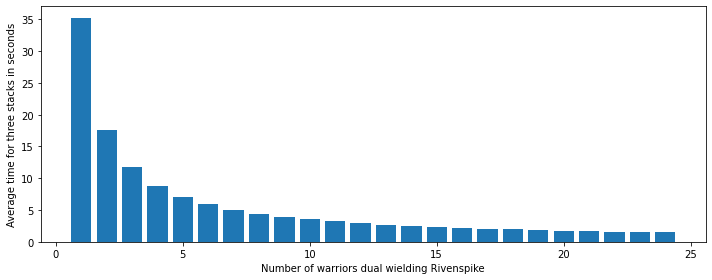

In [46]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(range(1,25), time_for_3_stacks_dw)
ax.set_ylabel('Average time for three stacks in seconds')
ax.set_xlabel('Number of warriors dual wielding Rivenspike')
fig.tight_layout()

In [47]:
time_for_3_stacks_oh = [avg_num_hits_for_three_stacks/(num_warrior * hits_per_sec_offhand) for num_warrior in num_warriors_with_rivenspike]
time_for_3_stacks_oh

[127.95905310300665,
 63.97952655150333,
 42.65301770100222,
 31.989763275751663,
 25.59181062060133,
 21.32650885050111,
 18.279864729000952,
 15.994881637875832,
 14.21767256700074,
 12.795905310300665,
 11.632641191182422,
 10.663254425250555,
 9.843004084846665,
 9.139932364500476,
 8.530603540200444,
 7.997440818937916,
 7.527003123706273,
 7.10883628350037,
 6.734687005421402,
 6.397952655150332,
 6.093288243000316,
 5.816320595591211,
 5.563437091435072,
 5.3316272126252775]

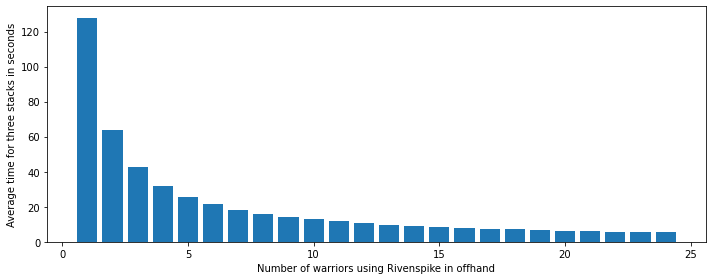

In [48]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(range(1,25), time_for_3_stacks_oh)
ax.set_ylabel('Average time for three stacks in seconds')
ax.set_xlabel('Number of warriors using Rivenspike in offhand')
fig.tight_layout()

In [49]:
# create also a function for the average time
def average_time_three_stacks(num_rs_dw, num_rs_oh):
    
    if num_rs_dw + num_rs_oh == 0:
        return np.inf
    return avg_num_hits_for_three_stacks/(num_rs_dw * hits_per_sec_dual_wield + num_rs_oh * hits_per_sec_offhand)

In [51]:
average_time_three_stacks(6, 2)

5.3859867397006305

# So how worth it is it?
As shown in my discord post, once the armor debuff by three stacks is applied, all physical damage on Twin Emps will be increased by a stunning 8.87%! 
In order to determine if the dps gain outweighs the individual dps loss by equipping Rivenspike, let's have a look at some sim results provided by Fish: <br />
<img src="sims.png"> <br />
According to this, let's assume the following dps losses while using Rivenspike:
- Dual Wielding: 9.5% DPS loss
- OH only: 3.4% DPS loss
<br />
<br />
<b>Further assumptions:</b>
<br />
<br />
- For simplicity, the dps gained from 1 or 2 stacks of Rivenspike is not taken into consideration
- One warrior dual wielding Rivenspike is enough to keep the buff up once three stacks are reached
- All other warriors will switch back to their normal weapons after three stacks are reached

In [72]:
# fight length in seconds
fight_length = 300
physical_dps_factor_dw = 0.905
physical_dps_factor_oh = 0.966
# multiplicator once three stacks are up
physical_dps_factor_debuff = 1.0887

In [73]:
# constant fight length is actually not 100% correct, as the dps increase would decrease the fight length
def net_dps(num_rs_dw, num_rs_oh, num_physical_dps, num_casters, fight_length):
    # num_rs_dw should always be bigger than 1, as that was the assumption
    if num_rs_dw < 1:
        return 1
    # start with calculation for time until stacks are up
    dps_before_debuff = (num_rs_dw * dps_factor_dw + num_rs_oh * dps_factor_oh + (num_physical_dps - num_rs_dw - num_rs_oh + num_casters) * 1)/(num_physical_dps + num_casters)
    # dps after debuff
    dps_after_debuff = ((1*dps_factor_dw + (num_physical_dps-1)*1)*dps_factor_debuff + num_casters * 1)/(num_physical_dps + num_casters)
    # time until debuff is up
    time_to_debuff = average_time_three_stacks(num_rs_dw, num_rs_oh)
    # now calculate the total dps as a weighted average
    return (time_to_debuff * dps_before_debuff + (fight_length - time_to_debuff) * dps_after_debuff)/fight_length

In [113]:
def print_dps_gain_one_rivenspike(num_physical_dps, num_caster_dps, fight_length):

    net_dps_overall_raid = net_dps(
        num_rs_dw = 1, 
        num_rs_oh = 0, 
        num_physical_dps = num_physical_dps, 
        num_casters = num_caster_dps,
        fight_length = fight_length
    )

    net_dps_physical_dps = net_dps(
        num_rs_dw = 1,
        num_rs_oh = 0,
        num_physical_dps = num_physical_dps,
        num_casters = 0,
        fight_length = fight_length
    )

    print(f'Average DPS gain overall for all melee dps: {net_dps_physical_dps-1:.2%}')
    print(f'Average DPS gain overall for the whole raid: {net_dps_overall_raid-1 :.2%}')

Lets have a look at the results for a lineup with 15 physical dps with one warrior dual wielding Rivenspike:

In [114]:
# total number of melees in the raid, change to adjust for a different raid composition
num_physical_dps = 15
num_healers = 12
raid_size = 40
num_caster_dps = raid_size -  num_physical_dps - num_healers
print_dps_gain_one_rivenspike(num_physical_dps, num_caster_dps, fight_length)

Average DPS gain overall for all melee dps: 7.14%
Average DPS gain overall for the whole raid: 3.83%


Now lets have a look at the results for a lineup of only 10 physical dps with one warrior dual wielding Rivenspike:

In [115]:
num_physical_dps = 10
num_healers = 12
raid_size = 40
num_caster_dps = raid_size -  num_physical_dps - num_healers
print_dps_gain_one_rivenspike(num_physical_dps, num_caster_dps, fight_length)

Average DPS gain overall for all melee dps: 6.80%
Average DPS gain overall for the whole raid: 2.43%


Below you can find also find the implementation of a grid search to evaluate the optimal number of Rivenspike users:

In [89]:
# lets search for the optimal number of rivenspike users
def net_dps_grid(num_melees, fight_length):
    params = []
    for i in range(1, num_melees+1):
        for u in range(0, num_melees+1-i):
            params.append({
                'num_rs_dw': i,
                'num_rs_oh': u,
                'net_dps': net_dps(i, u, num_melees, 0, fight_length)
            })
    return pd.DataFrame(params)

In [116]:
net_dps_df = net_dps_grid(15, 300)

In [117]:
best_setting = net_dps_df.loc[net_dps_df['net_dps'] == net_dps_df['net_dps'].max(), :]

In [118]:
best_setting

,num_rs_dw,num_rs_oh,net_dps
119,15,0,1.080418


This final result about the best setting indicates that the more warriors use Rivenspike in the beginning to get the stacks up, the better. The additional dps gain is, however, very minor (only about 0.9% dps).

## Conclusion
We saw, that one dual wielding Warrior using Rivenspike is already enough to increase the Raid DPS of all physical dps classes by over 7% (assuming 15 physical dps)! For the overall raid that would still be a dps gain of 3.8%! 
For a very caster heavy lineup with only 10 physical dps, the calculation still yields a dps gain of 6.8% for all physical dps, which translates into a dps gain of 2.4% for the overall raid.
That's why I think it's definitely worth using from a theoretical perspective.